<a href="https://colab.research.google.com/github/Kishankumar1328/kaggle-competition/blob/main/kaggle_contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import DaskLGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install catboost

In [ ]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")
sample_df=pd.read_csv("/content/sample_submission.csv")

In [ ]:
train_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
dataframes = [train_df, test_df, sample_df]
for df_name, df in zip(["train_df", "test_df", "sample_df"], dataframes):
    print(f"{df_name} shape: {df.shape}")


train_df shape: (58645, 13)
test_df shape: (39098, 12)
sample_df shape: (39098, 2)


In [ ]:
dataframes = [train_df, test_df]
for df_name, df in zip(["train_df", "test_df"], dataframes):
    print(f"{df_name} display: {df.head()}")


train_df display:    id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status

In [ ]:
dataframes = [train_df, test_df]
for df_name, df in zip(["train_df", "test_df"], dataframes):
    print(f"{df_name} shape: {df.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [ ]:
print(f'Missing values: {train_df.isna().sum()}')
print(f'Duplicated values: {train_df.duplicated().sum()}')

print(f'Missing values: {test_df.isna().sum()}')
print(f'Duplicated values: {test_df.duplicated().sum()}')

Missing values: id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Duplicated values: 0
Missing values: id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
Duplicated values: 0


In [ ]:
train_df.nunique()


,0
id,58645
person_age,53
person_income,2641
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,545
loan_int_rate,362
loan_percent_income,61


In [ ]:
# Select numerical columns (int64 and float64 types)
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select non-numerical (categorical) columns (object type)
non_numerical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
Categorical Columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
for col in numerical_columns:
  print(f"col:{col}")
  print(f"unique value:{train_df[col].unique()}")
  print(f"count value:{train_df[col].value_counts()}")
  print("\n")

col:id
unique value:[    0     1     2 ... 58642 58643 58644]
count value:id
0        1
39089    1
39091    1
39092    1
39093    1
        ..
19551    1
19552    1
19553    1
19554    1
58644    1
Name: count, Length: 58645, dtype: int64


col:person_age
unique value:[ 37  22  29  30  27  25  21  35  31  26  28  32  23  24  33  44  38  43
  46  48  36  41  34  40  47  42  51  50  39  56  60  49  58  54  45  59
  65  53  55  57  52  62  64  84  70  66  73  69  61  20  80  76 123]
count value:person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13


In [ ]:
le=LabelEncoder()
for col in non_numerical_columns:
  train_df[col]=le.fit_transform(train_df[col]).astype(int)

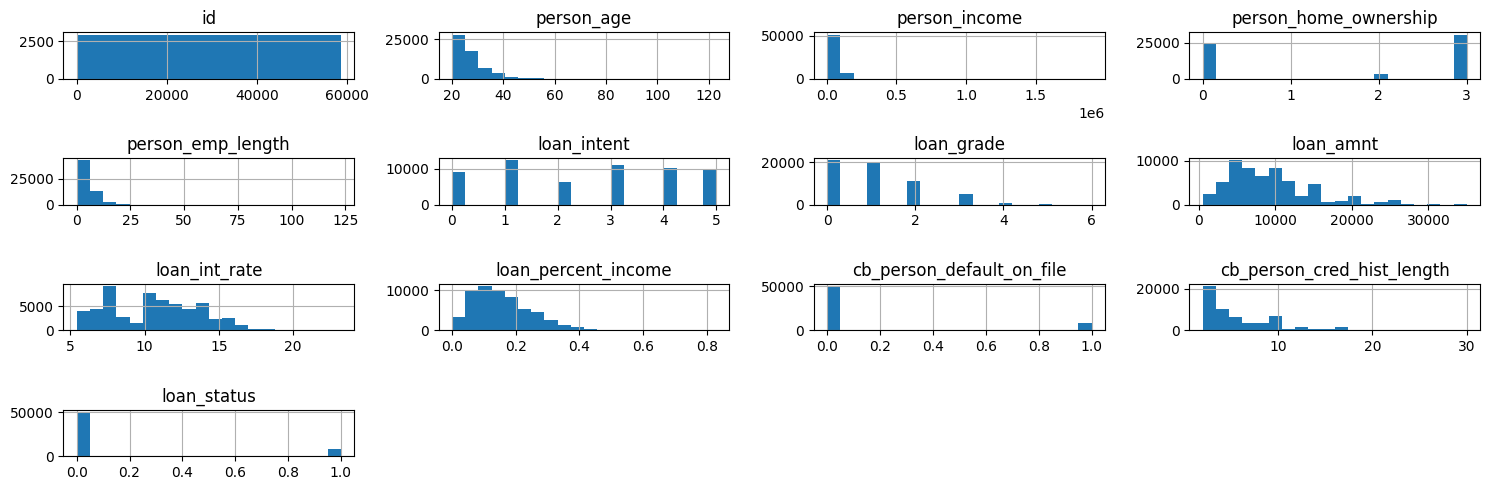

In [ ]:
train_df.hist(figsize=(15,5),bins=20)
plt.tight_layout()

Text(0.5, 1.0, 'Loan Status Distribution(Percentage%)')

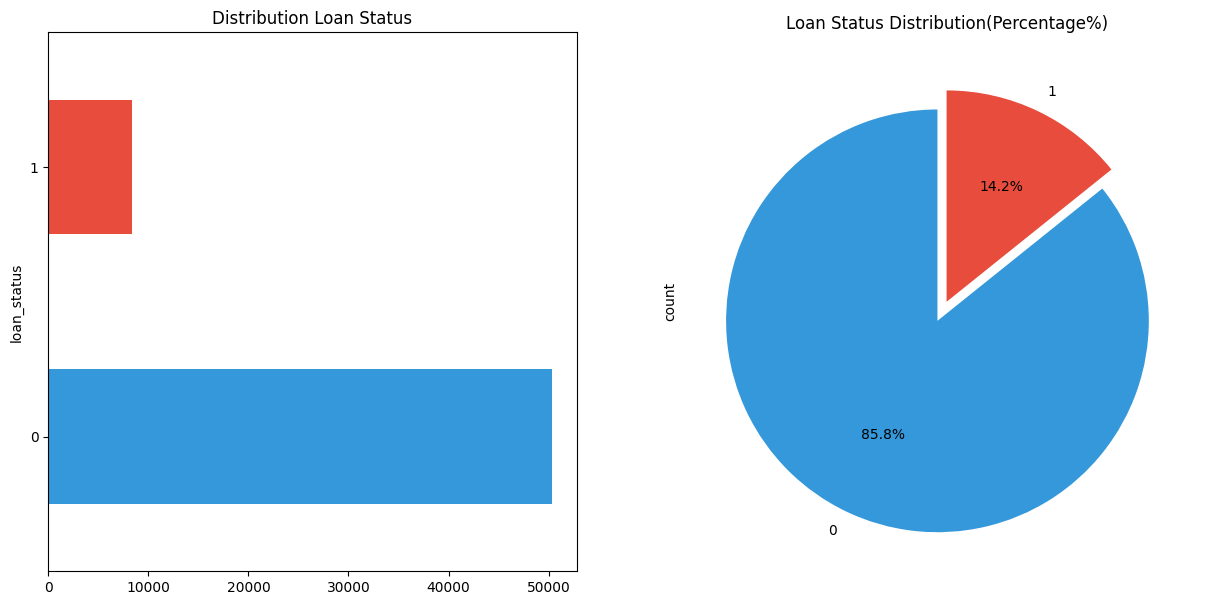

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
colors = ['#3498db', '#e74c3c']
train_df["loan_status"].value_counts().plot(kind="barh",
                                            color=colors
                                            ,alpha=1
                                            ,title="Distribution Loan Status"
                                            )
plt.subplot(1,2,2)
colors = ['#3498db', '#e74c3c']
explode = [0.1, 0]

train_df['loan_status'].value_counts().plot(kind='pie',
                                            autopct='%1.1f%%',
                                             colors=colors,
                                             startangle=90,
                                            explode=explode
                                            )

# Title for the pie chart
plt.title('Loan Status Distribution(Percentage%)')

In [ ]:
def plot_numerical_distribution(column_name, data=train_df):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], bins=20, kde=True, color='green')
    plt.title(f'Distribution of {column_name}')


    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name], color='green')
    plt.title(f'Boxplot of {column_name}')

    plt.subplot(1, 3, 3)
    sns.violinplot(x=data[column_name], color='green')
    plt.title(f'Violinplot of {column_name}')

    plt.tight_layout()
    plt.show()

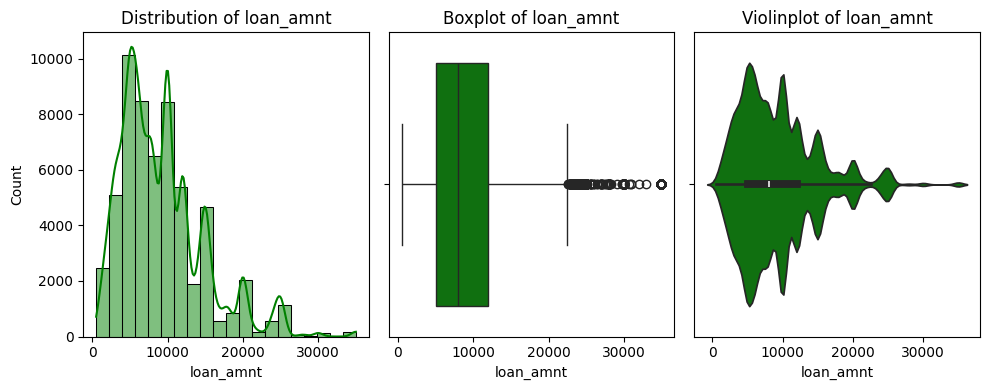

In [ ]:
plot_numerical_distribution("loan_amnt")

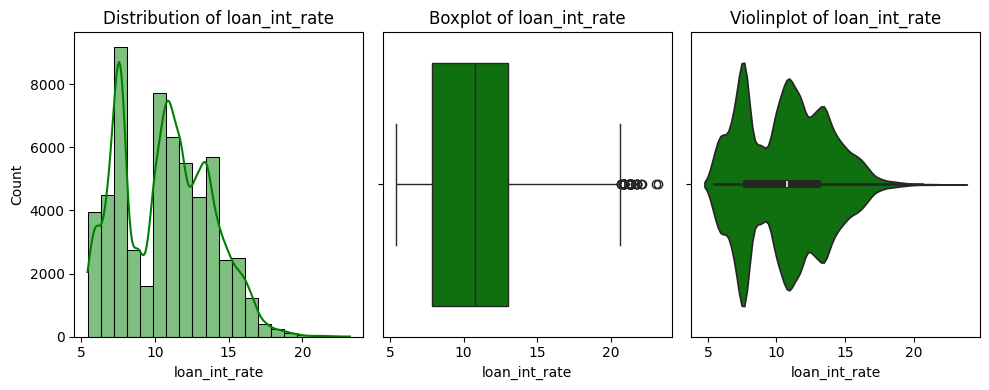

In [ ]:
plot_numerical_distribution("loan_int_rate")

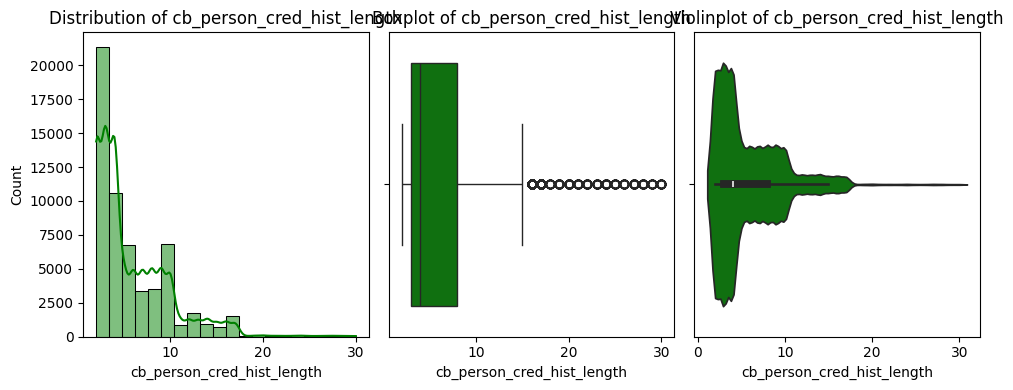

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_numerical_distribution("cb_person_cred_hist_length")
plt.tight_layout()

In [ ]:
train_df["person_emp_length"]=train_df["person_emp_length"].astype(int)
train_df["loan_int_rate"]=train_df["loan_int_rate"].astype(int)
train_df["loan_percent_income"]=train_df["loan_percent_income"].astype(int)

In [ ]:
# Splitting the data into training and testing sets
x = train_df.drop("loan_status", axis=1)
y = train_df["loan_status"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

from lightgbm import LGBMClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "XGBClassifier": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "LGBMClassifier": LGBMClassifier(verbosity=-1),
    "CatBoostClassifier": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, random_state=42)
}






Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12613
           1       0.75      0.34      0.47      2049

    accuracy                           0.89     14662
   macro avg       0.83      0.66      0.71     14662
weighted avg       0.88      0.89      0.87     14662



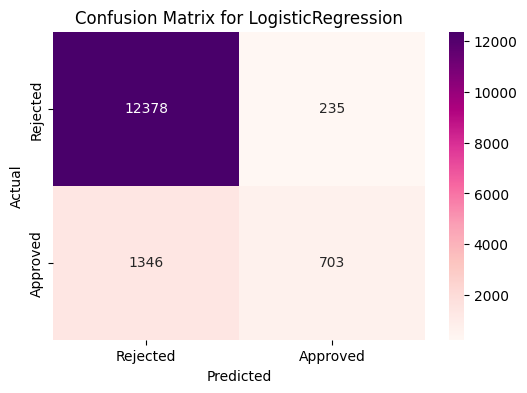



Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12613
           1       0.91      0.68      0.78      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.84      0.87     14662
weighted avg       0.94      0.95      0.94     14662



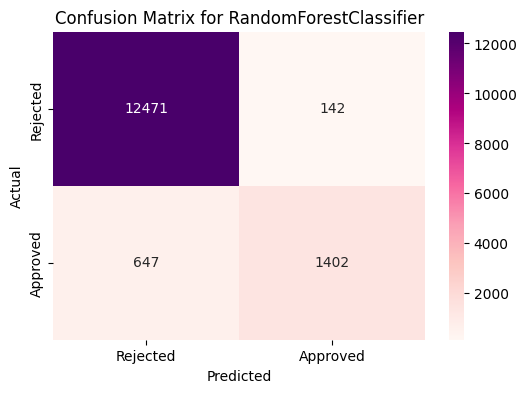



Classification Report for GaussianNB:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12613
           1       0.61      0.43      0.51      2049

    accuracy                           0.88     14662
   macro avg       0.76      0.69      0.72     14662
weighted avg       0.87      0.88      0.87     14662



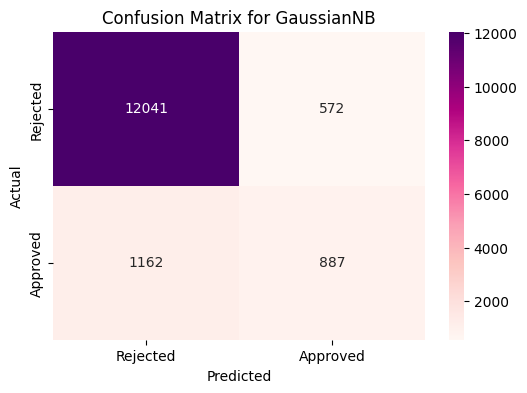



Classification Report for XGBClassifier:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.91      0.71      0.80      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.85      0.89     14662
weighted avg       0.95      0.95      0.95     14662



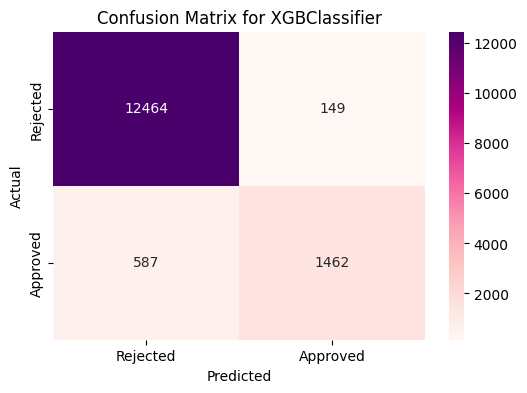



Classification Report for LGBMClassifier:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12613
           1       0.91      0.73      0.81      2049

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



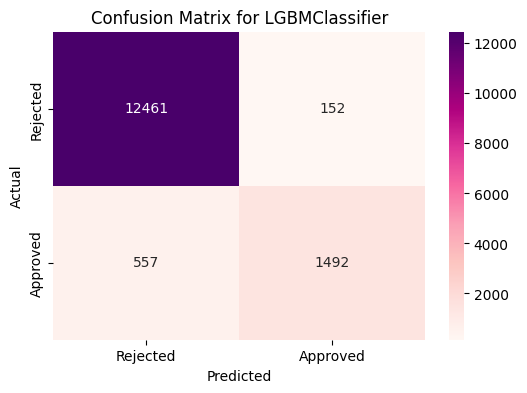



0:	learn: 0.6279357	total: 32.8ms	remaining: 3.25s
1:	learn: 0.5729223	total: 59.2ms	remaining: 2.9s
2:	learn: 0.5249514	total: 81.8ms	remaining: 2.65s
3:	learn: 0.4845007	total: 104ms	remaining: 2.5s
4:	learn: 0.4498862	total: 127ms	remaining: 2.41s
5:	learn: 0.4205438	total: 155ms	remaining: 2.42s
6:	learn: 0.3945777	total: 192ms	remaining: 2.55s
7:	learn: 0.3733182	total: 215ms	remaining: 2.47s
8:	learn: 0.3536326	total: 238ms	remaining: 2.41s
9:	learn: 0.3359625	total: 260ms	remaining: 2.34s
10:	learn: 0.3202745	total: 282ms	remaining: 2.28s
11:	learn: 0.3061203	total: 304ms	remaining: 2.23s
12:	learn: 0.2942862	total: 327ms	remaining: 2.19s
13:	learn: 0.2829716	total: 353ms	remaining: 2.17s
14:	learn: 0.2729808	total: 375ms	remaining: 2.13s
15:	learn: 0.2645674	total: 402ms	remaining: 2.11s
16:	learn: 0.2568156	total: 425ms	remaining: 2.07s
17:	learn: 0.2496432	total: 447ms	remaining: 2.04s
18:	learn: 0.2426259	total: 470ms	remaining: 2s
19:	learn: 0.2372100	total: 495ms	remaini

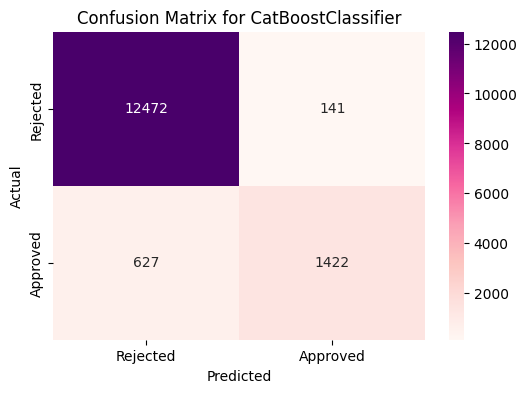



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,LogisticRegression,0.890321,0.892170,0.892170
1,RandomForestClassifier,0.999955,0.946187,0.946187
2,GaussianNB,0.880590,0.881735,0.881735
3,XGBClassifier,0.952732,0.949802,0.949802
4,LGBMClassifier,0.955255,0.951644,0.951644
5,CatBoostClassifier,0.950322,0.947620,0.947620


In [ ]:

# Initialize results list
results = []

# Loop through each model
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predictions on validation set
    y_pred = model.predict(x_test)

    # Train and Test Scores
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)

    # Append results
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })

    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\n" + "="*60 + "\n")

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print("Model Performance Table:")
display(results_df)

In [ ]:
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: LGBMClassifier with Accuracy: 0.9516


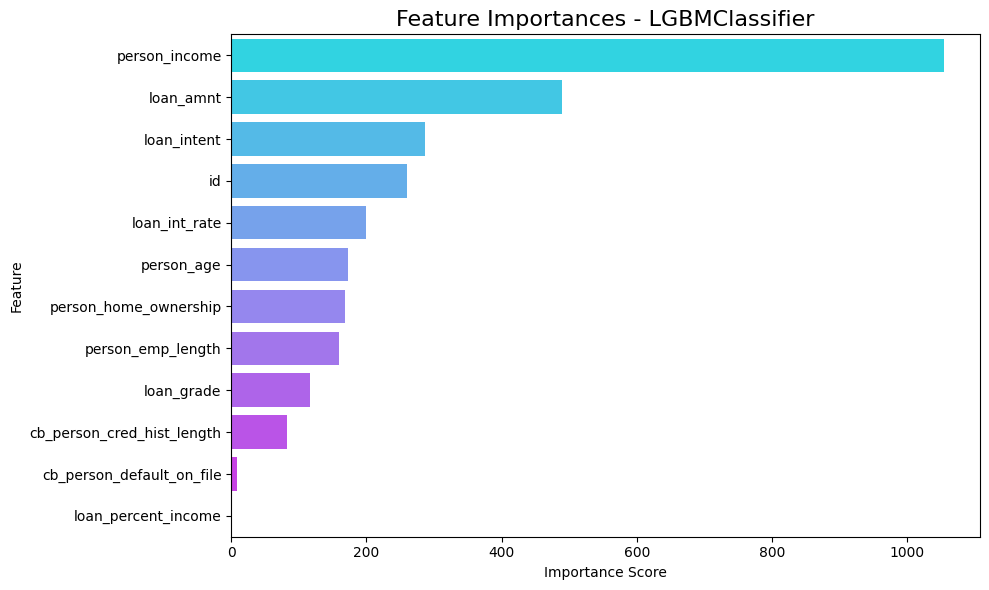

In [ ]:
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': x.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='cool')
    plt.title(f'Feature Importances - {best_model_name}', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The {best_model_name} model does not support feature importances.")

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best mode
cv = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')

# Display Cross-Validation Scores
print(f"Cross-Validation Scores: {cv}")
print(f"Mean Cross-Validation Score: {cv.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv.std():.4f}")

Cross-Validation Scores: [0.94691372 0.94952825 0.95487098 0.94929513 0.94895407]
Mean Cross-Validation Score: 0.9499
Standard Deviation of Cross-Validation Scores: 0.0026


In [ ]:
# Convert categorical columns using One-Hot Encoding
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Apply one-hot encoding on these categorical columns
X_train_encoded = pd.get_dummies(x, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align X_test with X_train to ensure they have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Now fit the model and make predictions
best_model = models["LGBMClassifier"]
best_model.fit(X_train_encoded, y)

y_test_pred_prob = best_model.predict_proba(X_test_encoded)[:, 1]

# Create submission dataframe
Loan_Approval = pd.DataFrame({
    'id': test_df['id'],
    'loan_status': y_test_pred_prob.round()
})

# Print the first 10 rows of the submission dataframe
print(Loan_Approval.head(7))


      id  loan_status
0  58645          1.0
1  58646          0.0
2  58647          1.0
3  58648          0.0
4  58649          0.0
5  58650          1.0
6  58651          0.0


In [ ]:
Loan_Approval.to_csv('Loan Approval.csv', index=False)
